In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [3]:
# loading dataset
car_dataset = pd.read_csv('/content/car data.csv')
car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
car_dataset.shape


(301, 9)

In [7]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
# checking categorical data
print(car_dataset['Fuel_Type'].value_counts())
print(car_dataset['Seller_Type'].value_counts())
print(car_dataset['Transmission'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [23]:
# encoding the categorical deta
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}}, inplace=True)

In [20]:
car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)

In [21]:
car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

In [24]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [25]:
# splittig features and label or x and y

X = car_dataset.drop(columns = ['Car_Name','Selling_Price'], axis = True)
Y = car_dataset['Selling_Price']
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [32]:
# splitting the data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [33]:
X.shape, X_train.shape, X_test.shape

((301, 7), (240, 7), (61, 7))

In [34]:
# model selection - 1. LinearRegression
lin_reg_model = LinearRegression().fit(X_train,Y_train)


In [35]:
# model evaluation - accuracy on training data
training_data_accuracy = lin_reg_model.predict(X_train)
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_accuracy)
score_1

0.8838169193709796

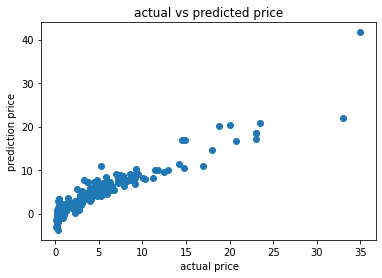

In [36]:
# data visualization - scatterplot
plt.scatter(Y_train, training_data_accuracy)
plt.xlabel(" actual price")
plt.ylabel("prediction price")
plt.title("actual vs predicted price")
plt.show()

In [37]:
# model evaluation - accuracy on testing data
test_data_accuracy = lin_reg_model.predict(X_test)
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_accuracy)
score_1

0.8401532365377697

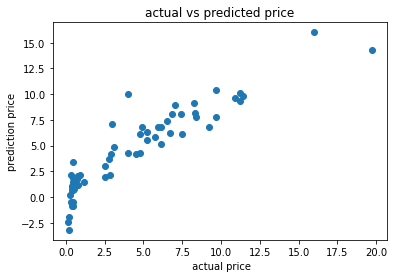

In [38]:
# data visualization - scatterplot
plt.scatter(Y_test, test_data_accuracy)
plt.xlabel(" actual price")
plt.ylabel("prediction price")
plt.title("actual vs predicted price")
plt.show()

In [39]:
# model selection - 2. Lasso Regression
lass_reg_model = Lasso().fit(X_train, Y_train)

In [40]:
# model evaluation - accuracy on training data
training_data_accuracy = lass_reg_model.predict(X_train)
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_accuracy)
score_1

0.843587395258283

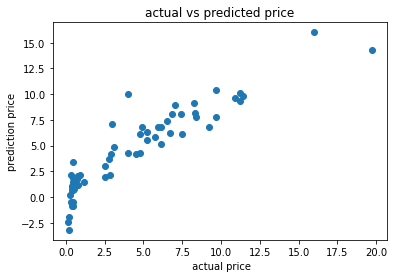

In [41]:
# data visualization - scatterplot
plt.scatter(Y_test, test_data_accuracy)
plt.xlabel(" actual price")
plt.ylabel("prediction price")
plt.title("actual vs predicted price")
plt.show()

In [42]:
# model evaluation - accuracy on testing data
test_data_accuracy = lass_reg_model.predict(X_test)
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_accuracy)
score_1

0.8497457570738539

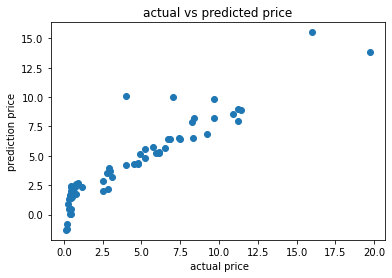

In [43]:
# data visualization - scatterplot
plt.scatter(Y_test, test_data_accuracy)
plt.xlabel(" actual price")
plt.ylabel("prediction price")
plt.title("actual vs predicted price")
plt.show()